<a href="https://colab.research.google.com/github/EngrFatimaKhawaja/Cv_project/blob/main/project_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Libraries**

In [2]:
!git clone https://github.com/EngrFatimaKhawaja/Cv_project.git

Cloning into 'Cv_project'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


In [22]:
!pip uninstall -y librosa resampy
!pip install librosa resampy



Found existing installation: librosa 0.10.1
Uninstalling librosa-0.10.1:
  Successfully uninstalled librosa-0.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.7/253.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 21.4 MB/s eta 0:00:00


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import librosa
import os

# **Extracting the feactures**

In [44]:
# Function to extract features from audio files
# Load the dataset
def load_data(test_size, chunk_duration, path,path_samples):
    x, y = [], []
    for file in os.listdir(path):
        # Extract features from the audio file
        #features = extract_features(os.path.join(path, file))
       # x.append(features)
        # Load audio file
        audio, sample_rate = librosa.load(path_samples + file, res_type='kaiser_fast')

        # Calculate number of chunks
        num_chunks = int(np.ceil(len(audio) / (sample_rate * chunk_duration)))

        # Extract features from each chunk
        for i in range(num_chunks):
            start = int(i * sample_rate * chunk_duration)
            end = min(len(audio), int((i + 1) * sample_rate * chunk_duration))
            chunk_audio = audio[start:end]

            # Extract features from audio chunk
            feature = extract_features_from_audio(chunk_audio, sample_rate)
            x.append(feature)

            # Extract class label from the file name
            class_label = file.split('(')[0]  # Assuming the class label is before the first '-'
            y.append(class_label)

    # Encode the labels
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=42)

def extract_features_from_audio(audio, sample_rate, mfcc=True, chroma=True, mel=True):
    result = np.array([])
    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40, n_fft=1024).T, axis=0)  # Adjust n_fft
        result = np.hstack((result, mfccs))
    if chroma:
        stft = np.abs(librosa.stft(audio, n_fft=1024))  # Adjust n_fft
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
        result = np.hstack((result, chroma))
    if mel:
        mel = np.mean(librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_fft=1024).T, axis=0)  # Adjust n_fft
        result = np.hstack((result, mel))
    return result


# **Def Model with dropout**

In [3]:
from tensorflow.keras import layers, models

from tensorflow.keras.layers import Dropout

def create_model_with_dropout(input_shape, num_classes, dropout_rate=0.5):
    model = models.Sequential()
    model.add(layers.Conv1D(32, 3, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(64, 3, activation='relu'))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(128, 3, activation='relu'))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(128, 3, activation='relu'))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(Dropout(dropout_rate))  # Adding dropout layer
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# **Split and Load the dataset**

In [45]:
# Load and split the dataset
test_size=0.2
chunk_duration=1
path='/content/drive/MyDrive/cv_project/samples'
path_samples='/content/drive/MyDrive/cv_project/samples/'
X_train, X_test, y_train, y_test = load_data(test_size,chunk_duration,path,path_samples)

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=70
  warnings.warn(


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [20]:


# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)


# **Update Input_shape(2D)**

In [21]:
# Update input_shape to have 2 dimensions (samples, time_steps)
input_shape = (X_train.shape[1], 1)
num_classes=4

In [22]:
input_shape

(180, 1)

# **Create Model with Dropout**

In [23]:
model_with_dropout = create_model_with_dropout(input_shape=(X_train.shape[1], 1), num_classes=num_classes)

# **Compile the model**

In [24]:
model_with_dropout.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

# **Display Model summary**

In [25]:
# Display model summary
model_with_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 178, 32)           128       
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 89, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 87, 64)            6208      
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 43, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_6 (Conv1D)           (None, 41, 128)           24704     
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 20, 128)          

# **Train the model**

In [26]:
model_with_dropout.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
14/14 [==============================] - 3s 56ms/step - loss: 1.4320 - accuracy: 0.3435 - val_loss: 1.1673 - val_accuracy: 0.4800
Epoch 2/50
14/14 [==============================] - 0s 8ms/step - loss: 1.1177 - accuracy: 0.5200 - val_loss: 0.9995 - val_accuracy: 0.6933
Epoch 3/50
14/14 [==============================] - 0s 7ms/step - loss: 0.9684 - accuracy: 0.5976 - val_loss: 0.8479 - val_accuracy: 0.7200
Epoch 4/50
14/14 [==============================] - 0s 8ms/step - loss: 0.8141 - accuracy: 0.6635 - val_loss: 0.7414 - val_accuracy: 0.7067
Epoch 5/50
14/14 [==============================] - 0s 7ms/step - loss: 0.7406 - accuracy: 0.6824 - val_loss: 0.6896 - val_accuracy: 0.7333
Epoch 6/50
14/14 [==============================] - 0s 9ms/step - loss: 0.5917 - accuracy: 0.7718 - val_loss: 0.5829 - val_accuracy: 0.7600
Epoch 7/50
14/14 [==============================] - 0s 10ms/step - loss: 0.6042 - accuracy: 0.7576 - val_loss: 0.4810 - val_accuracy: 0.8267
Epoch 8/50
14/14 [

# **Evaluate the model**

In [35]:
test_loss, test_acc= model_with_dropout.evaluate(X_test, y_test)
# Predict probabilities for each class
y_probabilities = model_with_dropout.predict(X_test)

# Convert probabilities to class predictions
y_pred = np.argmax(y_probabilities, axis=1)

4/4 [==============================] - 0s 5ms/step


# **Print the Accuracy**

F1 Score: 0.8723985890652557
Precision: 0.8730446806671852


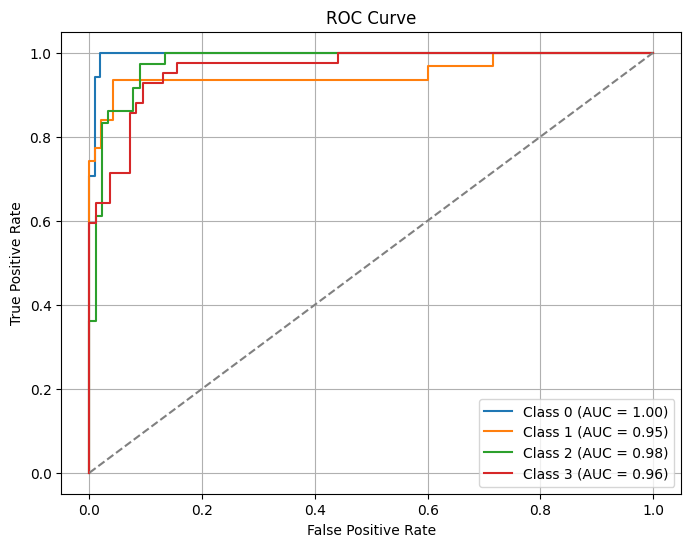

Confusion Matrix:
[[17  0  0  0]
 [ 1 26  2  2]
 [ 0  1 31  4]
 [ 1  2  3 36]]


In [42]:
from sklearn.metrics import f1_score,precision_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score:', f1)
# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    if np.sum(y_test == i) > 0:  # Check if the class has positive samples
        fpr, tpr, _ = roc_curve(y_test == i, y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


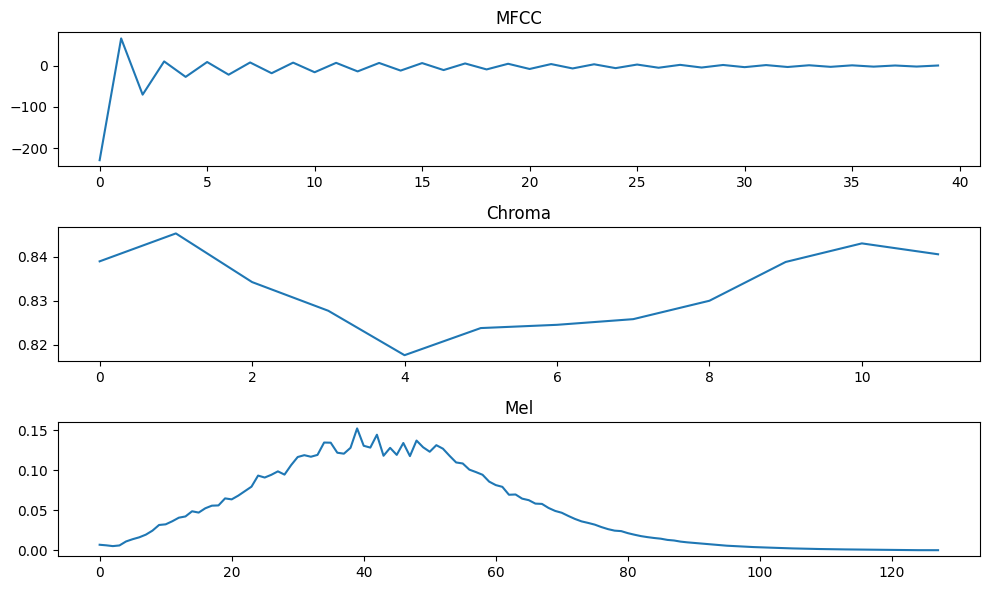

In [38]:
import matplotlib.pyplot as plt

# Function to visualize features for a single sample
def visualize_features(file_path, mfcc=True, chroma=True, mel=True):
    # Load audio file
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')

    # Extract features from the entire audio
    features = extract_features_from_audio(audio, sample_rate, mfcc=mfcc, chroma=chroma, mel=mel)

    # Plot features
    plt.figure(figsize=(10, 6))
    if mfcc:
        plt.subplot(3, 1, 1)
        plt.title('MFCC')
        plt.plot(features[:40])  # Assuming the first 40 elements correspond to MFCC features
    if chroma:
        plt.subplot(3, 1, 2)
        plt.title('Chroma')
        plt.plot(features[40:52])  # Assuming the next 12 elements correspond to Chroma features
    if mel:
        plt.subplot(3, 1, 3)
        plt.title('Mel')
        plt.plot(features[52:])  # Assuming the rest correspond to Mel features
    plt.tight_layout()
    plt.show()

# Replace 'file_path' with the path to the audio file you want to visualize
file_path = '/content/drive/MyDrive/cv_project/samples/Arcing (1).wav'
visualize_features(file_path)
